In [1]:
# Dependencies and Set Up

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path
import seaborn as sns

In [2]:
# File to Load 
apple_data_load = Path("Resources/data_for_weka_aw.csv")
fitbit_data_load = Path("Resources/data_for_weka_fb.csv")

In [3]:
# Read Data File and store into Pandas DataFrames
apple_data = pd.read_csv(apple_data_load)
fitbit_data = pd.read_csv(fitbit_data_load)
#fitbit_data
apple_data

,Unnamed: 0,age,gender,height,weight,Applewatch.Steps_LE,Applewatch.Heart_LE,Applewatch.Calories_LE,Applewatch.Distance_LE,EntropyApplewatchHeartPerDay_LE,EntropyApplewatchStepsPerDay_LE,RestingApplewatchHeartrate_LE,CorrelationApplewatchHeartrateSteps_LE,NormalizedApplewatchHeartrate_LE,ApplewatchIntensity_LE,SDNormalizedApplewatchHR_LE,ApplewatchStepsXDistance_LE,activity_trimmed
0,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.000000,1.000000,19.531302,0.138520,1.000000,0.089692,Lying
1,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.000000,1.000000,19.453390,0.137967,1.000000,0.102088,Lying
2,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.000000,1.000000,19.540825,0.138587,1.000000,0.115287,Lying
3,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.000000,1.000000,19.628260,0.139208,1.000000,0.129286,Lying
4,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.000000,0.982816,19.715695,0.139828,0.241567,0.144088,Lying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,3666,46,0,157.5,71.4,163.000000,157.250000,0.701500,0.075200,6.162427,5.655310,79.421795,1.000000,77.828205,0.822898,7.270204,12.257600,Running 7 METs
3652,3667,46,0,157.5,71.4,6.666667,157.307692,0.701500,0.075475,6.162427,5.655310,79.421795,1.000000,77.885897,0.823508,1.000000,0.503167,Running 7 METs
3653,3668,46,0,157.5,71.4,6.750000,156.250000,0.732000,0.075695,6.162427,5.655310,79.421795,1.000000,76.828205,0.812325,1.000000,0.510941,Running 7 METs
3654,3669,46,0,157.5,71.4,6.791667,158.090909,0.612500,0.077270,6.162427,5.655310,79.421795,1.000000,78.669114,0.831789,1.000000,0.524792,Running 7 METs


In [4]:
# Colum name for each data frame
apple_data['device']= "Apple Watch"
fitbit_data['device']= "FitBit Watch"

In [5]:
# Combine the data into a single dataset.
wearable_data_com = pd.concat([apple_data, fitbit_data])
wearable_data_com

,Unnamed: 0,age,gender,height,weight,Applewatch.Steps_LE,Applewatch.Heart_LE,Applewatch.Calories_LE,Applewatch.Distance_LE,EntropyApplewatchHeartPerDay_LE,...,Fitbit.Calories_LE,Fitbit.Distance_LE,EntropyFitbitHeartPerDay_LE,EntropyFitbitStepsPerDay_LE,RestingFitbitHeartrate_LE,CorrelationFitbitHeartrateSteps_LE,NormalizedFitbitHeartrate_LE,FitbitIntensity_LE,SDNormalizedFitbitHR_LE,FitbitStepsXDistance_LE
0,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2603,3666,46,0,157.5,71.4,NaN,NaN,NaN,NaN,NaN,...,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,0.0,1.0
2604,3667,46,0,157.5,71.4,NaN,NaN,NaN,NaN,NaN,...,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,1.0,1.0
2605,3668,46,0,157.5,71.4,NaN,NaN,NaN,NaN,NaN,...,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,1.0,1.0
2606,3669,46,0,157.5,71.4,NaN,NaN,NaN,NaN,NaN,...,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,1.0,1.0


In [6]:
# change colum names
wearable_data_com = wearable_data_com.rename(columns={"Applewatch.Steps_LE": "Steps_Apple"})
wearable_data_com = wearable_data_com.rename(columns={"Applewatch.Distance_LE": "Distance_Apple"})
wearable_data_com = wearable_data_com.rename(columns={"Fitbit.Steps_LE": "Steps_FitB"})
wearable_data_com = wearable_data_com.rename(columns={"Fitbit.Distance_LE": "Distance_FitB"})
wearable_data_com = wearable_data_com.rename(columns={"activity_trimmed": "activity"})
wearable_data_com

,Unnamed: 0,age,gender,height,weight,Steps_Apple,Applewatch.Heart_LE,Applewatch.Calories_LE,Distance_Apple,EntropyApplewatchHeartPerDay_LE,...,Fitbit.Calories_LE,Distance_FitB,EntropyFitbitHeartPerDay_LE,EntropyFitbitStepsPerDay_LE,RestingFitbitHeartrate_LE,CorrelationFitbitHeartrateSteps_LE,NormalizedFitbitHeartrate_LE,FitbitIntensity_LE,SDNormalizedFitbitHR_LE,FitbitStepsXDistance_LE
0,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2603,3666,46,0,157.5,71.4,NaN,NaN,NaN,NaN,NaN,...,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,0.0,1.0
2604,3667,46,0,157.5,71.4,NaN,NaN,NaN,NaN,NaN,...,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,1.0,1.0
2605,3668,46,0,157.5,71.4,NaN,NaN,NaN,NaN,NaN,...,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,1.0,1.0
2606,3669,46,0,157.5,71.4,NaN,NaN,NaN,NaN,NaN,...,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,1.0,1.0


In [7]:
# Group by device and activity to count the ocurrences
activity_counts = wearable_data_com.groupby(["device", "activity"]).size().unstack()

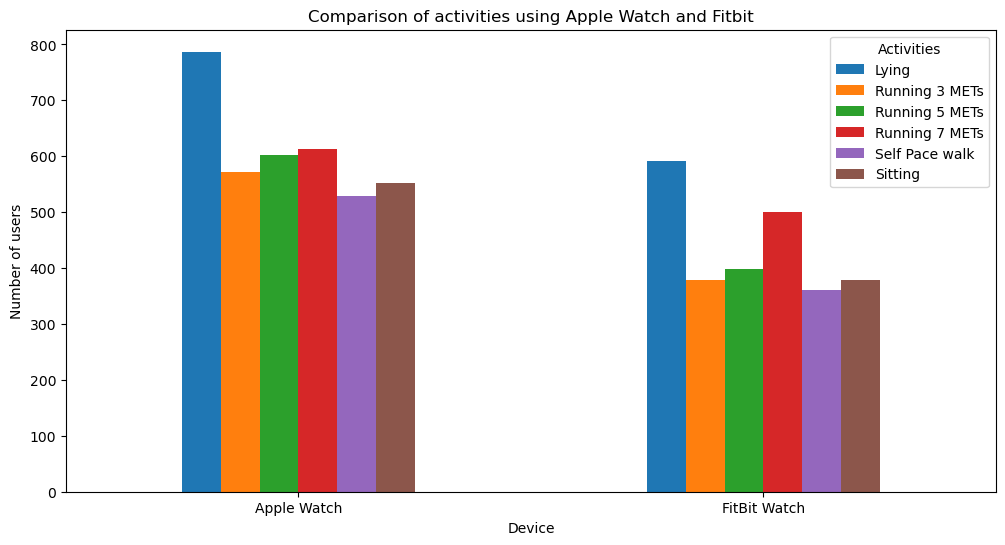

In [8]:
#plot the comparison 
activity_counts.plot(kind="bar", figsize=(12, 6))
plt.title ("Comparison of activities using Apple Watch and Fitbit")
plt.xlabel("Device")
plt.ylabel("Number of users")
plt.xticks(rotation=0)
plt.legend(title="Activities")
plt.show()

In [9]:
### In this part of the project we want to do a general comparision of users by devices in the diferent activities.
    # As we can see the numbers in the different activities. People use more apple watch in general in the different activites... now lets search something else


In [10]:
# make sure that colums are numerical
wearable_data_com["Distance_Apple"] = pd.to_numeric(wearable_data_com["Distance_Apple"], errors="coerce")
wearable_data_com["Steps_Apple"] = pd.to_numeric(wearable_data_com["Steps_Apple"], errors="coerce")
wearable_data_com["Distance_FitB"] = pd.to_numeric(wearable_data_com["Distance_FitB"], errors="coerce")
wearable_data_com["Steps_FitB"] = pd.to_numeric(wearable_data_com["Steps_FitB"], errors="coerce")

In [11]:
# We gonna identify the amount of use. Withe calculation of steps and distance.


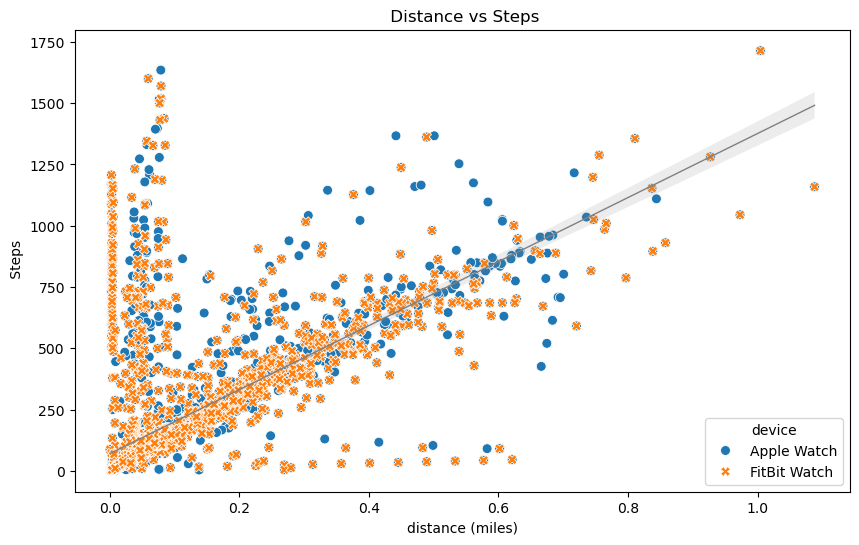

In [12]:
# create a scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=wearable_data_com, x="Distance_Apple", y="Steps_Apple", hue="device", style="device", s=50)
sns.regplot(data=wearable_data_com, x="Distance_Apple", y="Steps_Apple", scatter=False, color="gray", line_kws={"linewidth":1})

plt.title(" Distance vs Steps")
plt.xlabel("distance (miles)")
plt.ylabel(" Steps")
plt.show()

In [13]:
# Correlation Between Distance and steps
correlation_apple = wearable_data_com[["Distance_Apple", "Steps_Apple"]].corr()
correlation_FitB = wearable_data_com[["Distance_FitB", "Steps_FitB"]].corr()
# Average steps and Distance in apple
avg_steps_apple = wearable_data_com["Steps_Apple"].mean()
avg_distance_apple = wearable_data_com["Distance_Apple"].mean()

# Average steps and Distance in FitB
avg_steps_FitB = wearable_data_com["Steps_FitB"].mean()
avg_distance_FitB = wearable_data_com["Distance_FitB"].mean()

print([correlation_apple], [avg_steps_apple], [avg_distance_apple])
print([correlation_FitB], [avg_steps_FitB], [avg_distance_FitB])

[                Distance_Apple  Steps_Apple
Distance_Apple        1.000000     0.663788
Steps_Apple           0.663788     1.000000] [180.24642073557047] [0.08423558819462892]
[               Distance_FitB  Steps_FitB
Distance_FitB       1.000000    0.601578
Steps_FitB          0.601578    1.000000] [10.474360268001291] [33.105505327736516]


In [44]:
## in this last analisis that we are looking to identify how often use the watch we foound:
 # The correlation between ditance and steps in both cases are positives and are above 0,6. Also apple devices show a better correlation.
 # the Numbers of steps per person it is much biiger in apple users but in the other hand amount of distance is more common
    # that FitBit Users get further while use.